In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [237]:
df=pd.read_csv('train.csv')

In [238]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [239]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [240]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [241]:
df['Driving_License'].unique()

array([1, 0], dtype=int64)

In [242]:
df['Gender']=df["Gender"].map({'Male':0,'Female':1})

In [243]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [244]:
df['Annual_Premium'].max()

540165.0

In [245]:
df['Annual_Premium'].min()

2630.0

In [246]:
df['Annual_Premium'].sort_values(ascending=False)

190154    540165.0
54743     540165.0
268332    540165.0
144282    540165.0
11319     508073.0
            ...   
165126      2630.0
23792       2630.0
63679       2630.0
165136      2630.0
190554      2630.0
Name: Annual_Premium, Length: 381109, dtype: float64

In [247]:
df['Annual_Premium'].quantile(0.75)

39400.0

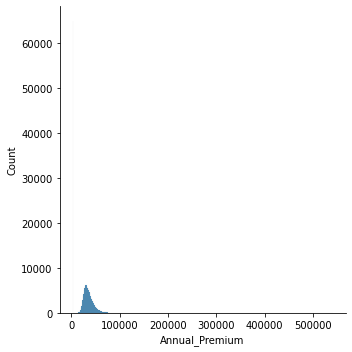

In [248]:
sns.displot(df['Annual_Premium'])

In [249]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [250]:
df.drop(['id','Region_Code','Policy_Sales_Channel'],axis=1,inplace=True)

In [251]:
cr=df.corr()

<AxesSubplot:>

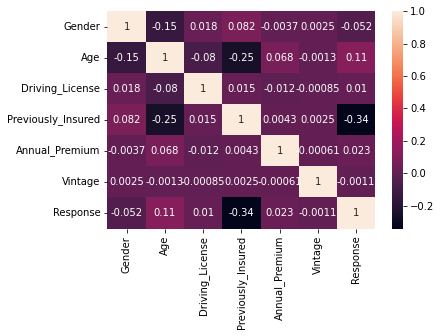

In [252]:
sns.heatmap(cr,annot=True)

In [253]:
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1,'No':0})


In [254]:
df=pd.get_dummies(df)

In [255]:



df['Result']=df['Response']
df.drop(['Response'],axis=True,inplace=True)

In [256]:
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Result
0,0,44,1,0,1,40454.0,217,0,0,1,1
1,0,76,1,0,0,33536.0,183,1,0,0,0
2,0,47,1,0,1,38294.0,27,0,0,1,1
3,0,21,1,1,0,28619.0,203,0,1,0,0
4,1,29,1,1,0,27496.0,39,0,1,0,0


In [257]:
df.shape

(381109, 11)

In [258]:
x=df.iloc[:,0:10]
y=df.iloc[:,-1]


In [259]:
#df_2=pd.read_csv('test.csv')


In [260]:
#df_2.head()

In [261]:
'''df_2['Vehicle_Damage']=df_2['Vehicle_Damage'].map({'Yes':1,'No':0})
df_2.drop(['id','Region_Code','Policy_Sales_Channel'],axis=1,inplace=True)
df_2['Gender']=df_2["Gender"].map({'Male':0,'Female':1})'''

'df_2[\'Vehicle_Damage\']=df_2[\'Vehicle_Damage\'].map({\'Yes\':1,\'No\':0})\ndf_2.drop([\'id\',\'Region_Code\',\'Policy_Sales_Channel\'],axis=1,inplace=True)\ndf_2[\'Gender\']=df_2["Gender"].map({\'Male\':0,\'Female\':1})'

In [262]:
#df_2=pd.get_dummies(df_2)

In [263]:
#df_2.shape

In [264]:
#df_2.head()

In [265]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [266]:
from sklearn.tree import DecisionTreeRegressor

In [267]:
model=DecisionTreeRegressor(random_state=10)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [268]:
model.score(x_train,y_train)

0.9576760586477037

In [269]:
y_pred=model.predict(x_test)

In [283]:
model.score(x_test,y_pred)

1.0

In [271]:
x_test.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
200222,1,21,1,1,0,20408.0,72,0,1,0
49766,0,55,1,0,1,37498.0,102,1,0,0
172201,1,41,1,0,1,2630.0,90,1,0,0
160713,1,26,1,0,0,2630.0,268,0,1,0
53272,0,51,1,0,1,34006.0,265,1,0,0


In [284]:
import pickle
#open your file where you want to store the data
pickle.dump(model,open('model_decision.pkl','wb'))
pickled_model=pickle.load(open('model_decision.pkl','rb'))

In [285]:
pickled_model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [280]:
'''from sklearn.decomposition import PCA
pca=PCA(0.60)'''

In [281]:
##x_pca=pca.fit_transform(x)

In [282]:
##x_pca.shape


(381109, 1)

In [276]:
#pca.explained_variance_ratio_

array([0.99997556])